# Relatório
## Ramon Griffo e Willian Silva

### Imports

In [1]:
from urllib.parse import urlparse, urljoin, ParseResult
from crawler import PageFetcher, Scheduler
from collections import OrderedDict
from crawler.domain import Domain
import seaborn as sns
from matplotlib import pyplot as plt
import time
import numpy as np
from tqdm import tqdm
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


### Arquitetura implementada:

- A partir da lista de sementes, instanciamos uma lista de urls, inicialmente, todas com profundidade 0. 
- Cada thread vai ser uma instância de page fetcher que buscará novas urls para incluir na lista a partir das urls da ainda não buscadas. 
- As funções de coletar são sincronizadas para evitar que duas threads coletem a mesma página simultaneamente. 
- Ao coletar uma url, definimos sua profundidade, que será somada em 1 se for no mesmo domínio onde foi encontrada ou setada como 0 caso contrário. 
- Definimos um limite de páginas coletadas e um máximo de profundidade.

### Decisões e desafios:

- Ao invés de retornar o generator usando yield no método discover_links, já checamos e adicionamos a página na lista dentro do próprio método.
- Muitas vezes o coletor dava erro por existirem muitos links com formatos inesperados como javascript e páginas mal formatadas ou em outras codificações. Decidimos colocar um tratamento de exceções que ignora esses links e páginas e exibe no terminal o erro encontrado.

### Sementes Utilizadas

In [2]:
seeds = ["https://5e.tools/", "https://www.dmsguild.com/", "https://www.dndbeyond.com/", "https://hitpointpress.com/", "https://ghostfiregaming.com/", "https://www.mercadorpg.com.br/"]

In [3]:
studies = list()
results = list()

### Criação dos estudos

In [4]:
n_threads = list(np.arange(1, 20, step=1)) + list(np.arange(30, 100, step=10))
for n in n_threads:
    studies.append({"n_threads": n})

### Execução dos estudos

Para cada estudo, executamos um coletor com limite de 100 páginas e profundidade máxima de 6.
Cada um dos estudos tem uma diferente quantidade de threads e cada estudo terá seu tempo medido e armazenado.

In [5]:
for study in tqdm(studies):
    start_time = time.time()
    scheduler = Scheduler("rpg-bot", page_limit=100, depth_limit=6, arr_urls_seeds=[urlparse(seed) for seed in seeds])
    n_threads = study["n_threads"]
    threads = list()
    for t in range(n_threads):
        pf = PageFetcher(scheduler)
        pf.start()
        threads.append(pf)
    for thread in threads:
        thread.join()
    new_time = time.time()
    total_time = new_time - start_time
    print(f"{total_time} segundos = {total_time / 60} minutos")
    results.append({"n_threads": n_threads, "time": total_time})

  0%|                                                                                                                                                              | 0/8 [00:00<?, ?it/s]

(ParseResult(scheme='https', netloc='www.dmsguild.com', path='/', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='hitpointpress.com', path='/', params='', query='', fragment=''), 0)
A url 'https://www.mercadorpg.com.br/' não foi coletada, a seguinte exceção foi lançada:
<class 'UnicodeDecodeError'>: 'utf-8' codec can't decode byte 0xe9 in position 1008: invalid continuation byte
(ParseResult(scheme='https', netloc='twitter.com', path='/dms_guild', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='www.facebook.com', path='/DungeonMastersGuild', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='www.dmsguild.com', path='/login.php', params='', query='', fragment=''), 1)
(ParseResult(scheme='https', netloc='www.drivethrurpg.com', path='/browse/pub/44/Wizards-of-the-Coast/subcategory/9730_9733/d20-Modern-Generic', params='', query='src=DnDC', fragment=''), 0)
(ParseResult(scheme='https', netloc='twitter.com', path=

(ParseResult(scheme='https', netloc='www.drivethrurpg.com', path='/browse/pub/44/Wizards-of-the-Coast/subcategory/9730_9733/d20-Modern-Generic', params='', query='src=DnDC', fragment='login_box'), 1)
(ParseResult(scheme='https', netloc='twitter.com', path='/dms_guild', params='', query='lang=da', fragment=''), 1)
(ParseResult(scheme='https', netloc='docs.google.com', path='/forms/d/e/1FAIpQLSeWuv5ypRICEVxiOZ8wXda06E354X23IWFYhOc2P8qP7Hf26Q/viewform', params='', query='usp=pp_url&entry.1569704748=DriveThruRPG.com', fragment=''), 0)
(ParseResult(scheme='https', netloc='www.facebook.com', path='/', params='', query='', fragment=''), 1)
(ParseResult(scheme='https', netloc='www.dmsguild.com', path='/browse.php', params='', query='filters=45680_0_0_0_0_0_0_0&src=fid45680', fragment=''), 1)
(ParseResult(scheme='https', netloc='www.drivethrurpg.com', path='/browse/pub/44/Wizards-of-the-Coast/subcategory/9730_9733/d20-Modern-Generic', params='', query='src=DnDC', fragment='create_account_box'),

(ParseResult(scheme='https', netloc='twitter.com', path='/dms_guild', params='', query='lang=it', fragment=''), 1)
(ParseResult(scheme='https', netloc='www.facebook.com', path='/watch/', params='', query='', fragment=''), 1)
(ParseResult(scheme='https', netloc='www.drivethrurpg.com', path='/browse/pub/44/Wizards-of-the-Coast/subcategory/9730_9733/d20-Modern-Generic', params='', query='filters=0_0_100_0_0&src=fid100', fragment=''), 1)
(ParseResult(scheme='https', netloc='www.dmsguild.com', path='/browse.php', params='', query='filters=0_45796_0_0_0_0_0_0&src=fid45796', fragment=''), 1)
(ParseResult(scheme='https', netloc='twitter.com', path='/dms_guild', params='', query='lang=hu', fragment=''), 1)
(ParseResult(scheme='https', netloc='www.facebook.com', path='/places/', params='', query='', fragment=''), 1)


 12%|██████████████████▋                                                                                                                                  | 1/8 [02:11<15:18, 131.24s/it]

(ParseResult(scheme='https', netloc='docs.google.com', path='/forms/d/e/1FAIpQLSeWuv5ypRICEVxiOZ8wXda06E354X23IWFYhOc2P8qP7Hf26Q/reportabuse', params='', query='source=https://docs.google.com/forms/d/e/1FAIpQLSeWuv5ypRICEVxiOZ8wXda06E354X23IWFYhOc2P8qP7Hf26Q/viewform?usp%3Dpp_url%26entry.1569704748%3DDriveThruRPG.com', fragment=''), 1)
131.2424018383026 segundos = 2.18737336397171 minutos
A url 'https://www.mercadorpg.com.br/' não foi coletada, a seguinte exceção foi lançada:
<class 'UnicodeDecodeError'>: 'utf-8' codec can't decode byte 0xe9 in position 1008: invalid continuation byte
(ParseResult(scheme='https', netloc='hitpointpress.com', path='/', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='hitpointpress.com', path='/', params='', query='', fragment='MainContent'), 1)
A url 'mailto:support@hitpointpress.com' não foi coletada, a seguinte exceção foi lançada:
<class 'urllib.error.URLError'>: <urlopen error unknown url type: mailto>
(ParseResult(scheme='h

(ParseResult(scheme='https', netloc='www.drivethrucomics.com', path='/shopping_cart.php', params='', query='', fragment=''), 1)
(ParseResult(scheme='https', netloc='www.drivethrufiction.com', path='/shopping_cart.php', params='', query='', fragment=''), 1)
(ParseResult(scheme='https', netloc='hitpointpress.com', path='/categories/', params='', query='_bc_fsnf=1&Product++Category=Reference%20Decks', fragment=''), 1)
(ParseResult(scheme='https', netloc='www.wargamevault.com', path='/shopping_cart.php', params='', query='', fragment=''), 1)
(ParseResult(scheme='http', netloc='www.twitter.com', path='', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='www.facebook.com', path='/v2.10/dialog/oauth', params='', query='client_id=1178097535547895&state=4b76c96dbc0a51091552dcd69ce8a6bc&response_type=code&sdk=php-sdk-5.6.1&redirect_uri=https%3A%2F%2Fwww.dmsguild.com%2Ffacebook%2Ffacebook_sign_up_action.php&scope=email%2Cpublic_profile%2Cuser_friends', fragment=''), 0)
(P

(ParseResult(scheme='https', netloc='dev.twitter.com', path='/overview/terms/policy', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='hitpointpress.com', path='/categories/', params='', query='_bc_fsnf=1&Product++Category=Digital', fragment=''), 1)
(ParseResult(scheme='https', netloc='pay.facebook.com', path='/', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='www.drivethrucomics.com', path='/index.php', params='', query='', fragment=''), 1)
(ParseResult(scheme='https', netloc='www.oculus.com', path='/', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='www.facebook.com', path='/v2.10/dialog/oauth', params='', query='client_id=1178097535547895&state=20d9b00354ce56b3d45ce38c596b175d&response_type=code&sdk=php-sdk-5.6.1&redirect_uri=https%3A%2F%2Fwww.dmsguild.com%2Ffacebook%2Ffacebook_sign_up_action.php&scope=email%2Cpublic_profile%2Cuser_friends', fragment=''), 0)
(ParseResult(scheme='https', netloc='docs.goo

(ParseResult(scheme='https', netloc='hitpointpress.com', path='/categories/', params='', query='_bc_fsnf=1&Product++Category=Miniatures', fragment=''), 1)
(ParseResult(scheme='https', netloc='ja-jp.facebook.com', path='/login.php', params='', query='skip_api_login=1&api_key=1178097535547895&kid_directed_site=0&app_id=1178097535547895&signed_next=1&next=https%3A%2F%2Fwww.facebook.com%2Fv2.10%2Fdialog%2Foauth%3Fclient_id%3D1178097535547895%26state%3D115ad7c0513b2cbdb71f6411c5dc5f8c%26response_type%3Dcode%26sdk%3Dphp-sdk-5.6.1%26redirect_uri%3Dhttps%253A%252F%252Fwww.dmsguild.com%252Ffacebook%252Ffacebook_sign_up_action.php%26scope%3Demail%252Cpublic_profile%252Cuser_friends%26ret%3Dlogin%26fbapp_pres%3D0%26logger_id%3Dc9c02db7-1709-4e39-970c-0ea5775b20ca%26tp%3Dunspecified&cancel_url=https%3A%2F%2Fwww.dmsguild.com%2Ffacebook%2Ffacebook_sign_up_action.php%3Ferror%3Daccess_denied%26error_code%3D200%26error_description%3DPermissions%2Berror%26error_reason%3Duser_denied%26state%3D115ad7c0513

Exception in thread Thread-11:
Traceback (most recent call last):
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\connection.py", line 175, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\util\connection.py", line 95, in create_connection
    raise err
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\connectionpool.py", line 710, in urlopen
    chunked=chunked,
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-p

70.34411835670471 segundos = 1.1724019726117452 minutos
A url 'https://www.mercadorpg.com.br/' não foi coletada, a seguinte exceção foi lançada:
<class 'UnicodeDecodeError'>: 'utf-8' codec can't decode byte 0xe9 in position 1008: invalid continuation byte
(ParseResult(scheme='https', netloc='hitpointpress.com', path='/', params='', query='', fragment=''), 0)
A url 'mailto:support@hitpointpress.com' não foi coletada, a seguinte exceção foi lançada:
<class 'urllib.error.URLError'>: <urlopen error unknown url type: mailto>
(ParseResult(scheme='https', netloc='hitpointpress.com', path='/', params='', query='', fragment='MainContent'), 1)
(ParseResult(scheme='https', netloc='www.facebook.com', path='/hitpointpress', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='www.instagram.com', path='/hitpointpress/', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='www.dmsguild.com', path='/', params='', query='', fragment=''), 0)
(ParseResult(schem

(ParseResult(scheme='https', netloc='blog.twitter.com', path='/', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='status.twitterstat.us', path='/', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='careers.twitter.com', path='/', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='cards-dev.twitter.com', path='/validator', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='business.twitter.com', path='/', params='', query='', fragment=''), 1)
(ParseResult(scheme='https', netloc='help.twitter.com', path='/', params='', query='', fragment=''), 0)
(ParseResult(scheme='http', netloc='www.twitter.com', path='', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='transparency.twitter.com', path='/', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='about.twitter.com', path='/en/who-we-are/our-company.html', params='', query='', fragment=''), 0)
(P

(ParseResult(scheme='https', netloc='hi-in.facebook.com', path='/login.php', params='', query='skip_api_login=1&api_key=1178097535547895&kid_directed_site=0&app_id=1178097535547895&signed_next=1&next=https%3A%2F%2Fwww.facebook.com%2Fv2.10%2Fdialog%2Foauth%3Fclient_id%3D1178097535547895%26state%3Da261bbf37f844c7216bd9d42fb4390c4%26response_type%3Dcode%26sdk%3Dphp-sdk-5.6.1%26redirect_uri%3Dhttps%253A%252F%252Fwww.dmsguild.com%252Ffacebook%252Ffacebook_sign_up_action.php%26scope%3Demail%252Cpublic_profile%252Cuser_friends%26ret%3Dlogin%26fbapp_pres%3D0%26logger_id%3Dc45e1bc1-2ac8-46d3-8972-d4b9d5dad342%26tp%3Dunspecified&cancel_url=https%3A%2F%2Fwww.dmsguild.com%2Ffacebook%2Ffacebook_sign_up_action.php%3Ferror%3Daccess_denied%26error_code%3D200%26error_description%3DPermissions%2Berror%26error_reason%3Duser_denied%26state%3Da261bbf37f844c7216bd9d42fb4390c4%23_%3D_&display=page&locale=hi_IN&pl_dbl=0', fragment=''), 0)
(ParseResult(scheme='https', netloc='www.twitter.com', path='/patreon',

Exception in thread Thread-14:
Traceback (most recent call last):
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\connection.py", line 175, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\util\connection.py", line 95, in create_connection
    raise err
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\connectionpool.py", line 710, in urlopen
    chunked=chunked,
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-p

53.10021352767944 segundos = 0.8850035587946574 minutos
A url 'https://www.mercadorpg.com.br/' não foi coletada, a seguinte exceção foi lançada:
<class 'UnicodeDecodeError'>: 'utf-8' codec can't decode byte 0xe9 in position 1008: invalid continuation byte
(ParseResult(scheme='https', netloc='hitpointpress.com', path='/', params='', query='', fragment=''), 0)
A url 'mailto:support@hitpointpress.com' não foi coletada, a seguinte exceção foi lançada:
<class 'urllib.error.URLError'>: <urlopen error unknown url type: mailto>
(ParseResult(scheme='https', netloc='hitpointpress.com', path='/', params='', query='', fragment='MainContent'), 1)
(ParseResult(scheme='https', netloc='www.dmsguild.com', path='/', params='', query='', fragment=''), 0)
A url 'https://docs.google.com/forms/d/e/1FAIpQLSeWuv5ypRICEVxiOZ8wXda06E354X23IWFYhOc2P8qP7Hf26Q/viewform?usp=pp_url&entry.1569704748=Dungeon Masters Guild' não foi coletada, a seguinte exceção foi lançada:
<class 'http.client.InvalidURL'>: URL can't co

(ParseResult(scheme='https', netloc='cards-dev.twitter.com', path='/validator', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='status.twitterstat.us', path='/pages/564314ae3309c22c3b0002fa', params='', query='', fragment=''), 1)
(ParseResult(scheme='https', netloc='privacy.patreon.com', path='/policies', params='', query='', fragment=''), 0)
A url 'https://pbs.twimg.com/profile_images/1522629199089000452/AZ_Wqowk.png' não foi coletada, a seguinte exceção foi lançada:
<class 'UnicodeDecodeError'>: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
(ParseResult(scheme='https', netloc='www.drivethrufiction.com', path='/shopping_cart.php', params='', query='', fragment=''), 1)
(ParseResult(scheme='https', netloc='www.drivethrucards.com', path='/shopping_cart.php', params='', query='', fragment=''), 1)
(ParseResult(scheme='https', netloc='www.storytellersvault.com', path='/', params='', query='', fragment=''), 1)
A url 'https://support.patreon

(ParseResult(scheme='https', netloc='support.twitter.com', path='/articles/20170514', params='', query='', fragment=''), 0)
(ParseResult(scheme='http', netloc='optout.aboutads.info', path='/', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='hitpointpress.com', path='/categories/', params='', query='_bc_fsnf=1&Product++Category=Books', fragment=''), 1)
(ParseResult(scheme='https', netloc='about.twitter.com', path='/en/who-we-are/twitter-for-good.html', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='hi-in.facebook.com', path='/login.php', params='', query='skip_api_login=1&api_key=1178097535547895&kid_directed_site=0&app_id=1178097535547895&signed_next=1&next=https%3A%2F%2Fwww.facebook.com%2Fv2.10%2Fdialog%2Foauth%3Fclient_id%3D1178097535547895%26state%3D2a23aedbd928a7ccb8e4c7b5c52d9a44%26response_type%3Dcode%26sdk%3Dphp-sdk-5.6.1%26redirect_uri%3Dhttps%253A%252F%252Fwww.dmsguild.com%252Ffacebook%252Ffacebook_sign_up_action.php%26sco

Exception in thread Thread-35:
Traceback (most recent call last):
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\connection.py", line 175, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\util\connection.py", line 95, in create_connection
    raise err
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\connectionpool.py", line 710, in urlopen
    chunked=chunked,
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-p

53.81471872329712 segundos = 0.8969119787216187 minutos
A url 'https://www.mercadorpg.com.br/' não foi coletada, a seguinte exceção foi lançada:
<class 'UnicodeDecodeError'>: 'utf-8' codec can't decode byte 0xe9 in position 1008: invalid continuation byte
(ParseResult(scheme='https', netloc='hitpointpress.com', path='/', params='', query='', fragment=''), 0)
A url 'mailto:support@hitpointpress.com' não foi coletada, a seguinte exceção foi lançada:
<class 'urllib.error.URLError'>: <urlopen error unknown url type: mailto>
(ParseResult(scheme='https', netloc='hitpointpress.com', path='/', params='', query='', fragment='MainContent'), 1)
(ParseResult(scheme='https', netloc='www.facebook.com', path='/hitpointpress', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='www.instagram.com', path='/hitpointpress/', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='www.dmsguild.com', path='/', params='', query='', fragment=''), 0)
A url 'https://doc

(ParseResult(scheme='https', netloc='policies.google.com', path='/privacy', params='', query='hl=en', fragment=''), 0)
(ParseResult(scheme='https', netloc='www.linkedin.com', path='/legal/privacy-policy', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='privacy.twitter.com', path='/', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='about.twitter.com', path='/en/who-we-are/our-company.html', params='', query='', fragment=''), 0)
(ParseResult(scheme='http', netloc='ads.twitter.com', path='/', params='', query='ref=en-btc-how-twitter-ads-work', fragment=''), 0)
(ParseResult(scheme='https', netloc='www.facebook.com', path='/v2.10/dialog/oauth', params='', query='client_id=1178097535547895&state=005fd41ac73c15cb4ae7de84cc2b8d2f&response_type=code&sdk=php-sdk-5.6.1&redirect_uri=https%3A%2F%2Fwww.dmsguild.com%2Ffacebook%2Ffacebook_sign_up_action.php&scope=email%2Cpublic_profile%2Cuser_friends', fragment=''), 0)
(ParseResult(scheme='https', 

(ParseResult(scheme='https', netloc='status.twitterstat.us', path='/pages/history/564314ae3309c22c3b0002fa', params='', query='', fragment=''), 1)
(ParseResult(scheme='https', netloc='myaccount.google.com', path='/', params='', query='hl=en', fragment=''), 0)
(ParseResult(scheme='https', netloc='hitpointpress.com', path='/categories/', params='', query='_bc_fsnf=1&Product++Category=Books', fragment=''), 1)
(ParseResult(scheme='https', netloc='payments.google.com', path='/legaldocument', params='', query='family=0.privacynotice&hl=en', fragment=''), 0)
(ParseResult(scheme='http', netloc='optout.aboutads.info', path='/', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='www.wargamevault.com', path='/index.php', params='', query='', fragment=''), 1)
(ParseResult(scheme='https', netloc='www.pathfinderinfinite.com', path='/login.php', params='', query='', fragment=''), 1)
(ParseResult(scheme='https', netloc='www.drivethrucomics.com', path='/index.php', params='', qu

Exception in thread Thread-57:
Traceback (most recent call last):
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\connection.py", line 175, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\util\connection.py", line 95, in create_connection
    raise err
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\connectionpool.py", line 710, in urlopen
    chunked=chunked,
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-p

52.69170117378235 segundos = 0.8781950195630391 minutos
A url 'https://www.mercadorpg.com.br/' não foi coletada, a seguinte exceção foi lançada:
<class 'UnicodeDecodeError'>: 'utf-8' codec can't decode byte 0xe9 in position 1008: invalid continuation byte
(ParseResult(scheme='https', netloc='hitpointpress.com', path='/', params='', query='', fragment=''), 0)
A url 'mailto:support@hitpointpress.com' não foi coletada, a seguinte exceção foi lançada:
<class 'urllib.error.URLError'>: <urlopen error unknown url type: mailto>
(ParseResult(scheme='https', netloc='hitpointpress.com', path='/', params='', query='', fragment='MainContent'), 1)
(ParseResult(scheme='https', netloc='www.facebook.com', path='/hitpointpress', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='www.instagram.com', path='/hitpointpress/', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='twitter.com', path='/HitPointPress', params='', query='', fragment=''), 0)
A url 'htt

(ParseResult(scheme='https', netloc='safebrowsing.google.com', path='/', params='', query='utm_source=pp&hl=en', fragment=''), 0)
(ParseResult(scheme='https', netloc='accounts.google.com', path='/ServiceLogin', params='', query='passive=1209600&continue=https://policies.google.com/privacy?hl%3Den&followup=https://policies.google.com/privacy?hl%3Den&hl=en&ec=GAZAoQQ', fragment=''), 0)
(ParseResult(scheme='https', netloc='careers.twitter.com', path='/', params='', query='', fragment='twtr-main'), 1)
(ParseResult(scheme='https', netloc='transparency.twitter.com', path='/', params='', query='', fragment='twtr-main'), 1)
(ParseResult(scheme='https', netloc='www.youtube.com', path='/feed/history/search_history', params='', query='utm_source=pp&hl=en', fragment=''), 0)
(ParseResult(scheme='https', netloc='cards-dev.twitter.com', path='/validator', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='www.linkedin.com', path='/legal/privacy-policy', params='', query='', fr

(ParseResult(scheme='https', netloc='workspace.google.com', path='/intl/pt-BR/', params='', query='', fragment=''), 1)
(ParseResult(scheme='https', netloc='business.twitter.com', path='/', params='', query='', fragment=''), 1)
(ParseResult(scheme='https', netloc='contacts.google.com', path='', params='', query='hl=en', fragment=''), 0)
(ParseResult(scheme='https', netloc='developer.twitter.com', path='/en/docs', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='marketing.twitter.com', path='/en/insights', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='www.android.com', path='/security/overview/', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='cards-dev.twitter.com', path='/validator', params='', query='', fragment='timeline'), 1)
(ParseResult(scheme='https', netloc='help.twitter.com', path='/', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='about.twitter.com', path='/en/who-we-a

Exception in thread Thread-113:
Traceback (most recent call last):
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\connection.py", line 175, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\util\connection.py", line 95, in create_connection
    raise err
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\connectionpool.py", line 710, in urlopen
    chunked=chunked,
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-

53.56513023376465 segundos = 0.8927521705627441 minutos
A url 'https://www.mercadorpg.com.br/' não foi coletada, a seguinte exceção foi lançada:
<class 'UnicodeDecodeError'>: 'utf-8' codec can't decode byte 0xe9 in position 1008: invalid continuation byte
(ParseResult(scheme='https', netloc='hitpointpress.com', path='/', params='', query='', fragment=''), 0)
A url 'mailto:support@hitpointpress.com' não foi coletada, a seguinte exceção foi lançada:
<class 'urllib.error.URLError'>: <urlopen error unknown url type: mailto>
(ParseResult(scheme='https', netloc='hitpointpress.com', path='/', params='', query='', fragment='MainContent'), 1)
(ParseResult(scheme='https', netloc='www.dmsguild.com', path='/', params='', query='', fragment=''), 0)
A url 'https://docs.google.com/forms/d/e/1FAIpQLSeWuv5ypRICEVxiOZ8wXda06E354X23IWFYhOc2P8qP7Hf26Q/viewform?usp=pp_url&entry.1569704748=Dungeon Masters Guild' não foi coletada, a seguinte exceção foi lançada:
<class 'http.client.InvalidURL'>: URL can't co

(ParseResult(scheme='https', netloc='careers.twitter.com', path='/', params='', query='', fragment='twtr-main'), 1)
(ParseResult(scheme='https', netloc='cards-dev.twitter.com', path='/validator', params='', query='', fragment=''), 0)
(ParseResult(scheme='http', netloc='www.networkadvertising.org', path='/choices/', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='www.facebook.com', path='/v2.10/dialog/oauth', params='', query='client_id=1178097535547895&state=82c115fe13bd08aa66ef13b1c27d5a61&response_type=code&sdk=php-sdk-5.6.1&redirect_uri=https%3A%2F%2Fwww.dmsguild.com%2Ffacebook%2Ffacebook_sign_up_action.php&scope=email%2Cpublic_profile%2Cuser_friends', fragment=''), 0)
(ParseResult(scheme='https', netloc='www.storytellersvault.com', path='/', params='', query='', fragment=''), 1)
(ParseResult(scheme='https', netloc='transparency.twitter.com', path='/', params='', query='', fragment='twtr-main'), 1)
(ParseResult(scheme='http', netloc='optout.aboutads.info',

(ParseResult(scheme='http', netloc='www.networkadvertising.org', path='/', params='', query='', fragment=''), 1)
(ParseResult(scheme='https', netloc='transparencyreport.google.com', path='/safe-browsing/overview', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='www.bulletin.com', path='/', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='privacy.google.com', path='/businesses/affiliates', params='', query='hl=en', fragment=''), 0)
(ParseResult(scheme='https', netloc='www.twitter.com', path='/patreon', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='about.google', path='/products/', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='ja-jp.facebook.com', path='/login.php', params='', query='skip_api_login=1&api_key=1178097535547895&kid_directed_site=0&app_id=1178097535547895&signed_next=1&next=https%3A%2F%2Fwww.facebook.com%2Fv2.10%2Fdialog%2Foauth%3Fclient_id%3D1178097535547895%26stat

(ParseResult(scheme='https', netloc='enterprise.google.com', path='/chrome/chrome-browser/', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='business.linkedin.com', path='/elevate', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='g.co', path='/YourFamily', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='account.google.com', path='/', params='', query='', fragment=''), 0)
(ParseResult(scheme='http', netloc='www.google.com', path='/settings/ads', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='developers.facebook.com', path='/', params='', query='ref=pf', fragment=''), 0)
(ParseResult(scheme='https', netloc='adssettings.google.com', path='/', params='', query='ref=privacy-policy&hl=en', fragment=''), 0)


Exception in thread Thread-134:
Traceback (most recent call last):
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\connection.py", line 175, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\util\connection.py", line 95, in create_connection
    raise err
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\connectionpool.py", line 710, in urlopen
    chunked=chunked,
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-

54.07683801651001 segundos = 0.9012806336085002 minutos
A url 'https://www.mercadorpg.com.br/' não foi coletada, a seguinte exceção foi lançada:
<class 'UnicodeDecodeError'>: 'utf-8' codec can't decode byte 0xe9 in position 1008: invalid continuation byte
(ParseResult(scheme='https', netloc='hitpointpress.com', path='/', params='', query='', fragment=''), 0)
A url 'mailto:support@hitpointpress.com' não foi coletada, a seguinte exceção foi lançada:
<class 'urllib.error.URLError'>: <urlopen error unknown url type: mailto>
(ParseResult(scheme='https', netloc='www.dmsguild.com', path='/', params='', query='', fragment=''), 0)
A url 'https://docs.google.com/forms/d/e/1FAIpQLSeWuv5ypRICEVxiOZ8wXda06E354X23IWFYhOc2P8qP7Hf26Q/viewform?usp=pp_url&entry.1569704748=Dungeon Masters Guild' não foi coletada, a seguinte exceção foi lançada:
<class 'http.client.InvalidURL'>: URL can't contain control characters. '/forms/d/e/1FAIpQLSeWuv5ypRICEVxiOZ8wXda06E354X23IWFYhOc2P8qP7Hf26Q/viewform?usp=pp_url&e

(ParseResult(scheme='https', netloc='www.twitter.com', path='/patreon', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='privacy.twitter.com', path='/', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='www.linkedin.com', path='/legal/privacy-policy', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='www.drivethrufiction.com', path='/shopping_cart.php', params='', query='', fragment=''), 1)
(ParseResult(scheme='https', netloc='www.drivethrucards.com', path='/shopping_cart.php', params='', query='', fragment=''), 1)
(ParseResult(scheme='https', netloc='about.twitter.com', path='/en/who-we-are/our-company.html', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='marketing.twitter.com', path='/', params='', query='', fragment=''), 0)
(ParseResult(scheme='https', netloc='www.drivethrurpg.com', path='/browse/pub/44/Wizards-of-the-Coast/subcategory/9730_262/Gamma-World', params='', query='src=

(ParseResult(scheme='https', netloc='it-it.facebook.com', path='/login.php', params='', query='skip_api_login=1&api_key=1178097535547895&kid_directed_site=0&app_id=1178097535547895&signed_next=1&next=https%3A%2F%2Fwww.facebook.com%2Fv2.10%2Fdialog%2Foauth%3Fclient_id%3D1178097535547895%26state%3D7585caa946450582f6c8e5899a5182b1%26response_type%3Dcode%26sdk%3Dphp-sdk-5.6.1%26redirect_uri%3Dhttps%253A%252F%252Fwww.dmsguild.com%252Ffacebook%252Ffacebook_sign_up_action.php%26scope%3Demail%252Cpublic_profile%252Cuser_friends%26ret%3Dlogin%26fbapp_pres%3D0%26logger_id%3Da93a867e-6805-4e58-9ee4-29d682c7a8b4%26tp%3Dunspecified&cancel_url=https%3A%2F%2Fwww.dmsguild.com%2Ffacebook%2Ffacebook_sign_up_action.php%3Ferror%3Daccess_denied%26error_code%3D200%26error_description%3DPermissions%2Berror%26error_reason%3Duser_denied%26state%3D7585caa946450582f6c8e5899a5182b1%23_%3D_&display=page&locale=it_IT&pl_dbl=0', fragment=''), 0)
(ParseResult(scheme='https', netloc='ar-ar.facebook.com', path='/login.

A url 'https://www.intellum.com/privacy-policy' não foi coletada, a seguinte exceção foi lançada:
<class 'urllib.error.URLError'>: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1091)>
(ParseResult(scheme='https', netloc='status.twitterstat.us', path='/pages/history/564314ae3309c22c3b0002fa', params='', query='', fragment=''), 1)
(ParseResult(scheme='https', netloc='payments.google.com', path='/legaldocument', params='', query='family=0.privacynotice&hl=en', fragment=''), 0)
(ParseResult(scheme='https', netloc='www.wargamevault.com', path='/index.php', params='', query='', fragment=''), 1)
(ParseResult(scheme='https', netloc='userresearch.google.com', path='/', params='', query='l=9&reserved=0&pType=andro&productTag=andr&campaignType=ghc&campaignDate=apr17&labelTag=0&referral_code=Wc85355', fragment=''), 0)
(ParseResult(scheme='https', netloc='fiber.google.com', path='/legal/privacy.html', params='', query='', fragment=''), 0)

Exception in thread Thread-199:
Traceback (most recent call last):
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\connection.py", line 175, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\util\connection.py", line 95, in create_connection
    raise err
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-packages\urllib3\connectionpool.py", line 710, in urlopen
    chunked=chunked,
  File "C:\Users\Ramon\anaconda3\envs\ri\lib\site-

56.15046787261963 segundos = 0.9358411312103272 minutos


### Dataframe dos estudos

In [6]:
df = pd.DataFrame.from_dict(results)
df

,n_threads,time
0,1,131.242402
1,6,70.344118
2,11,53.100214
3,16,53.814719
4,30,52.691701
5,50,53.565130
6,70,54.076838
7,90,56.150468


In [7]:
df.to_parquet("results.parquet")

In [2]:
df = pd.read_parquet("results.parquet")

### Máquina utilzada
I9-9900K - 8 cores - 16 threads

24GB RAM DDR4

## Gráfico do tempo em função do número de threads

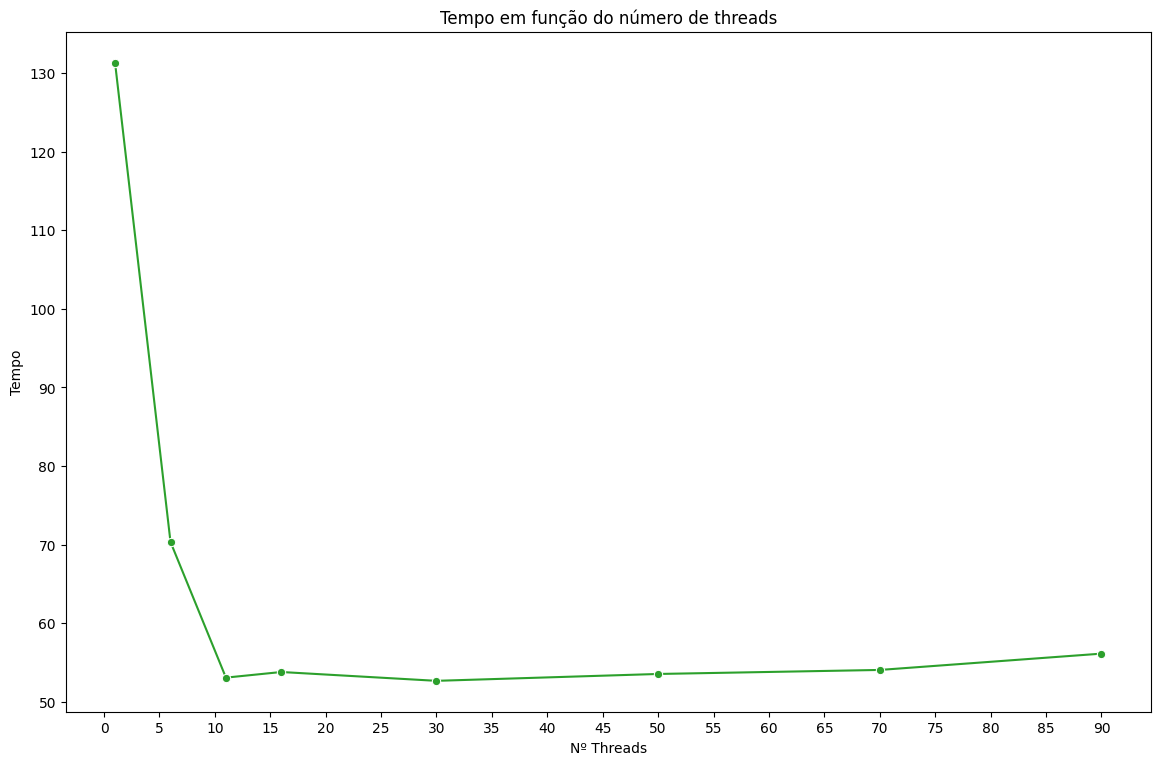

In [7]:
plt.figure(figsize=(14, 9), dpi=100)
plot = sns.lineplot(data=df, x="n_threads", y="time", marker="o", color="tab:green")
plt.xlabel("Nº Threads")
plt.ylabel("Tempo")
plt.title("Tempo em função do número de threads")
plot.set_xticks(np.arange(0, 91, step=5))
plt.show()

### Observações sobre o gráfico
- Pode-se observar que a coleta com uma única thread é significativamente mais lenta que as outras coletas.
- O tempo praticamente estabiliza depois de um certo número de threads (por volta de 11).